# LETID - Outdoor Geospatioal Demo

![PVDeg Logo](../PVD_logo.png)


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pvdeg
from pvdeg import DATA_DIR
import dask.array as da
import dask.dataframe as dd
import xarray as xr
import os

In [2]:
# This information helps with debugging and getting support :)
import sys, platform
print("Working on a ", platform.system(), platform.release())
print("Python version ", sys.version)
print("Pandas version ", pd.__version__)
print("pvdeg version ", pvdeg.__version__)

Working on a  Windows 10
Python version  3.11.4 | packaged by Anaconda, Inc. | (main, Jul  5 2023, 13:38:37) [MSC v.1916 64 bit (AMD64)]
Pandas version  2.1.0
pvdeg version  0.2.0+12.g277eda3.dirty


## Single location example

In [2]:
weather_file = os.path.join(DATA_DIR,'psm3_demo.csv')
WEATHER, META = pvdeg.weather.read(weather_file,'psm')

In [3]:
kwargs = {'tau_0': 115, # us, carrier lifetime in non-degraded states, e.g. LETID/LID states A or C
        'tau_deg': 55, # us, carrier lifetime in fully-degraded state, e.g. LETID/LID state B
        'wafer_thickness': 180, # um
        's_rear': 46, # cm/s
        'cell_area': 243, # cm^2
        'na_0': 100,
        'nb_0': 0,
        'nc_0': 0,
        'mechanism_params': 'repins'
    }

In [4]:
pvdeg.letid.calc_letid_outdoors(weather_df=WEATHER, meta=META, **kwargs)

,Temperature,Injection,NA,NB,NC,tau,Jsc,Voc,Isc,FF,Pmp,Pmp_norm
time,,,,,,,,,,,,
1999-01-01 00:30:00-07:00,0.0,NaN,100.000000,0.000000e+00,0.000000e+00,115.000000,41.590997,0.666327,10.106612,0.840987,5.663467,1.000000
1999-01-01 01:30:00-07:00,0.0,NaN,100.000000,1.702422e-15,0.000000e+00,115.000000,41.590997,0.666327,10.106612,0.840987,5.663467,1.000000
1999-01-01 02:30:00-07:00,0.0,NaN,100.000000,3.404843e-15,5.403329e-36,115.000000,41.590997,0.666327,10.106612,0.840987,5.663467,1.000000
1999-01-01 03:30:00-07:00,0.0,NaN,100.000000,5.107265e-15,1.620999e-35,115.000000,41.590997,0.666327,10.106612,0.840987,5.663467,1.000000
1999-01-01 04:30:00-07:00,0.0,NaN,100.000000,6.809686e-15,3.241997e-35,115.000000,41.590997,0.666327,10.106612,0.840987,5.663467,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
1999-12-31 19:30:00-07:00,0.0,NaN,27.833654,6.778463e+01,4.381716e+00,66.112142,41.333851,0.654974,10.044126,0.838966,5.519257,0.974537
1999-12-31 20:30:00-07:00,0.0,NaN,27.833654,6.778463e+01,4.381716e+00,66.112142,41.333851,0.654974,10.044126,0.838966,5.519257,0.974537
1999-12-31 21:30:00-07:00,0.0,NaN,27.833654,6.778463e+01,4.381716e+00,66.112142,41.333851,0.654974,10.044126,0.838966,5.519257,0.974537


### Start distributed compute cluster - DASK

In [2]:
local = {'manager': 'local',
         'n_workers': 1,
         'threads_per_worker': 8, # Number of CPUs
         }

kestrel = {
    'manager': 'slurm',
    'n_jobs': 1,  # Number of nodes used for parallel processing
    'cores': 104,
    'memory': '256GB',
    'account': 'pvsoiling',
    'queue': 'debug',
    'walltime': '1:00:00',
    'processes': 104,
    'job_extra_directives': ['-o ./logs/slurm-%j.out'],
    }

pvdeg.geospatial.start_dask(hpc=kestrel)

/home/jkaras/envs/pvdeg/py310/lib/python3.10/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 46547 instead
  warnings.warn(


Dashboard: http://10.60.1.202:46547/status


<Client: 'tcp://10.60.1.202:44373' processes=0 threads=0, memory=0 B>

In [11]:
# Get weather data
weather_db = 'NSRDB'

weather_arg = {'satellite': 'Americas',
               'names': 2022,
               'NREL_HPC': True,
               'attributes': ['air_temperature', 'wind_speed', 'dhi', 'ghi', 'dni', 'relative_humidity']}

weather_ds, meta_df = pvdeg.weather.get(weather_db, geospatial=True, **weather_arg)

# Define geographical region
meta_SW = meta_df[meta_df['state'].isin(['Colorado', 'New Mexico', 'Utah', 'Arizona'])]
meta_SW_sub, gids_SW_sub = pvdeg.utilities.gid_downsampling(meta_SW, 6)

weather_SW_sub = weather_ds.sel(gid=meta_SW_sub.index)

In [12]:
weather_SW_sub

<xarray.Dataset>
Dimensions:            (time: 17520, gid: 486)
Coordinates:
  * gid                (gid) int64 277461 277473 277485 ... 554484 554496 554508
  * time               (time) datetime64[ns] 2022-01-01 ... 2022-12-31T23:30:00
Data variables:
    temp_air           (time, gid) float32 dask.array<chunksize=(17520, 3), meta=np.ndarray>
    wind_speed         (time, gid) float32 dask.array<chunksize=(17520, 3), meta=np.ndarray>
    dhi                (time, gid) float32 dask.array<chunksize=(17520, 3), meta=np.ndarray>
    ghi                (time, gid) float32 dask.array<chunksize=(17520, 3), meta=np.ndarray>
    dni                (time, gid) float32 dask.array<chunksize=(17520, 3), meta=np.ndarray>
    relative_humidity  (time, gid) float32 dask.array<chunksize=(17520, 3), meta=np.ndarray>
Attributes:
    full_version_record:  {"rex": "0.2.80", "pandas": "2.0.0", "numpy": "1.23...
    package:              rex
    version:              4.0.0

In [13]:
# Define desired analysis
geo = {'func': pvdeg.letid.calc_letid_outdoors,
       'weather_ds': weather_SW_sub,
       'meta_df': meta_SW_sub,
       'tau_0': 115, # us, carrier lifetime in non-degraded states, e.g. LETID/LID states A or C
       'tau_deg': 55, # us, carrier lifetime in fully-degraded state, e.g. LETID/LID state B
       'wafer_thickness': 180, # um
       's_rear': 46, # cm/s
       'cell_area': 243, # cm^2
       'na_0': 100,
       'nb_0': 0,
       'nc_0': 0,
       'mechanism_params': 'repins'
}

letid_res = pvdeg.geospatial.analysis(**geo)

/home/jkaras/envs/pvdeg/py310/lib/python3.10/site-packages/distributed/client.py:3125: UserWarning: Sending large graph of size 11.03 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(


In [14]:
letid_res

<xarray.Dataset>
Dimensions:      (latitude: 22, longitude: 26, time: 17520)
Coordinates:
  * latitude     (latitude) float32 31.81 32.29 32.77 ... 40.93 41.41 41.89
  * longitude    (longitude) float32 -114.3 -113.8 -113.3 ... -102.8 -102.3
  * time         (time) datetime64[ns] 2022-01-01 ... 2022-12-31T23:30:00
Data variables:
    Temperature  (time, latitude, longitude) float64 nan nan nan ... nan nan nan
    Injection    (time, latitude, longitude) float64 nan nan nan ... nan nan nan
    NA           (time, latitude, longitude) float64 nan nan nan ... nan nan nan
    NB           (time, latitude, longitude) float64 nan nan nan ... nan nan nan
    NC           (time, latitude, longitude) float64 nan nan nan ... nan nan nan
    tau          (time, latitude, longitude) float64 nan nan nan ... nan nan nan
    Jsc          (time, latitude, longitude) float64 nan nan nan ... nan nan nan
    Voc          (time, latitude, longitude) float64 nan nan nan ... nan nan nan
    Isc          (time, latitude, longitude) float64 nan nan nan ... nan nan nan
    FF           (time, latitude, longitude) float64 nan nan nan ... nan nan nan
    Pmp          (time, latitude, longitude) float64 nan nan nan ... nan nan nan
    Pmp_norm     (time, latitude, longitude) float64 nan nan nan ... nan nan nan

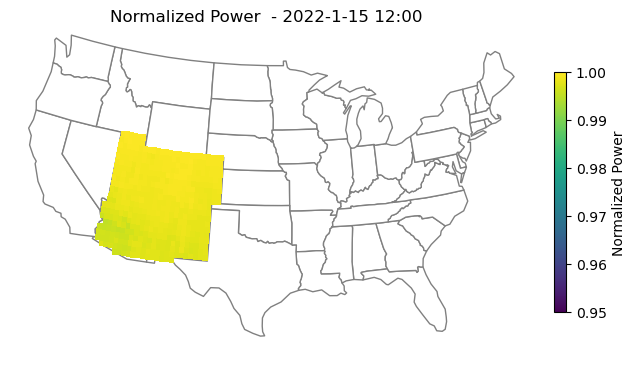

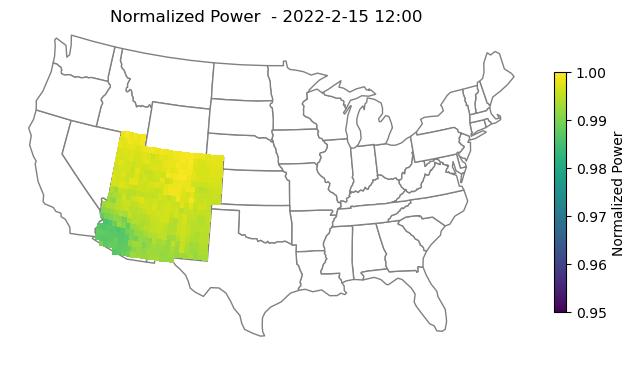

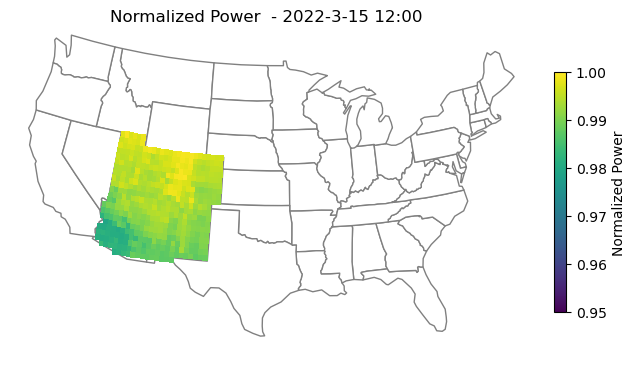

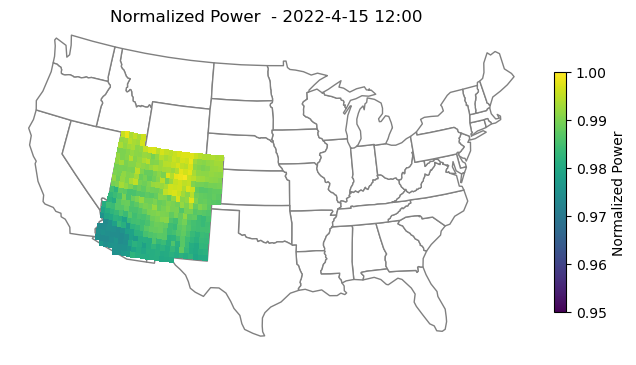

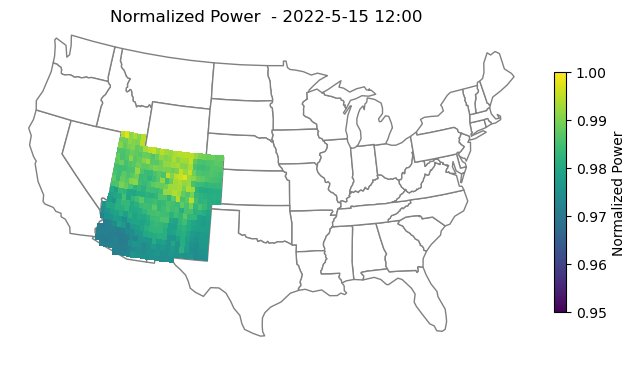

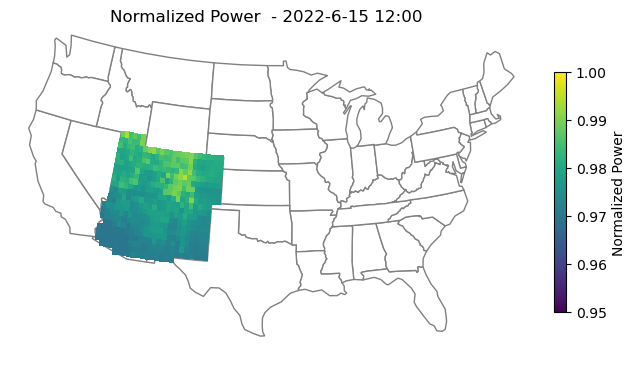

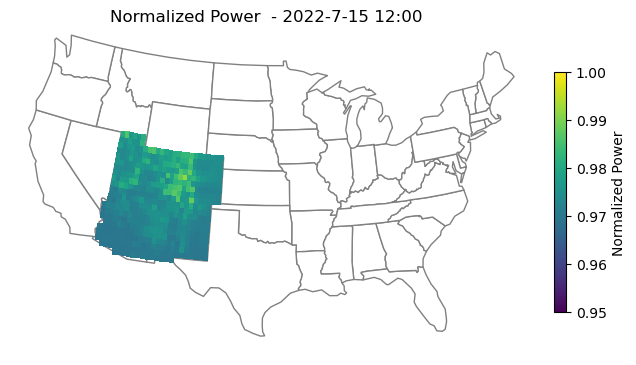

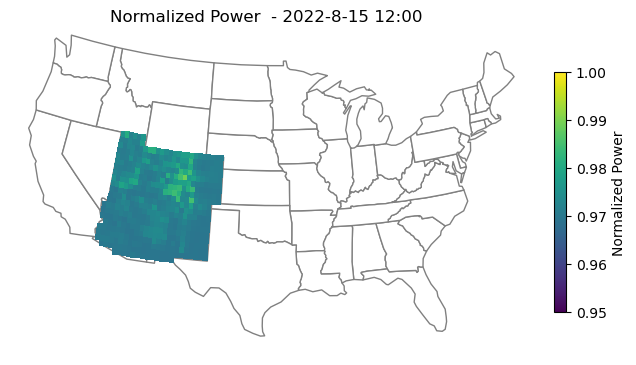

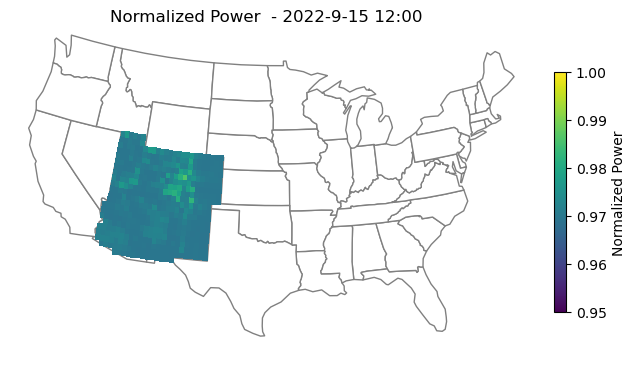

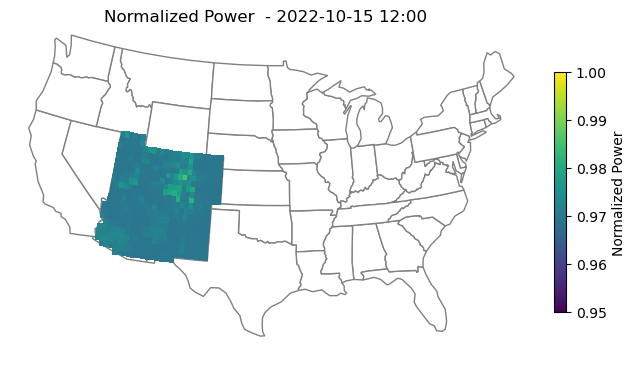

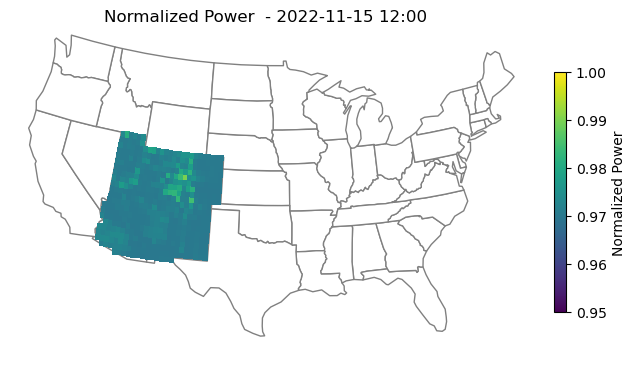

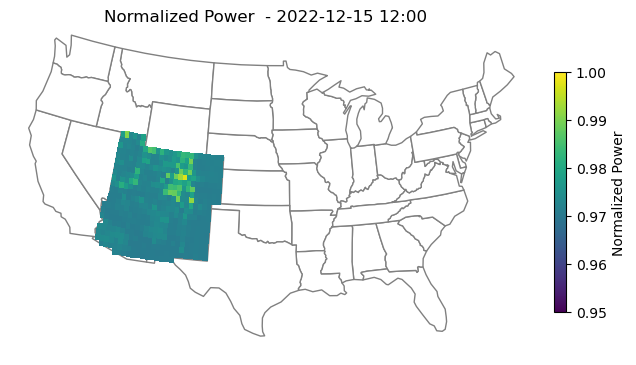

In [18]:
from matplotlib.animation import FuncAnimation
from matplotlib.animation import PillowWriter
import matplotlib.animation as animation
import datetime
ims = []
for n in range(1, 13):
     for i, np_t in enumerate(letid_res.time):
         t = pd.Timestamp(np_t.values).time()
         d = pd.Timestamp(np_t.values).day
         m = pd.Timestamp(np_t.values).month
         if m == n:
             if d == 15:
                 if t == datetime.time(12):
                     fig, ax = pvdeg.geospatial.plot_USA(letid_res['Pmp_norm'].sel(time=np_t),
                             cmap='viridis', vmin=0.95, vmax=1, 
                             title=f'Normalized Power  - 2022-{m}-{d} 12:00', 
                             cb_title='Normalized Power')
                     #plt.savefig(f'./images/RH_animation_{n}.png', dpi=600)

#import imageio
#ims = [imageio.imread(f'./images/RH_animation_{n}.png') for n in range(1, 13)]
# imageio.mimwrite(f'./images/RH_animation.gif', ims, format='GIF', duration=1000, loop=10)

/tmp/ipykernel_3222583/2410058272.py:42: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  ims = [imageio.imread(f'./images/LETID_plot_animation_{n}.png') for n in range(1, 13)]


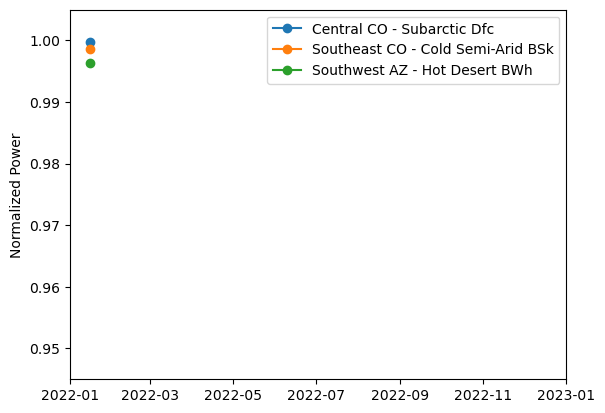

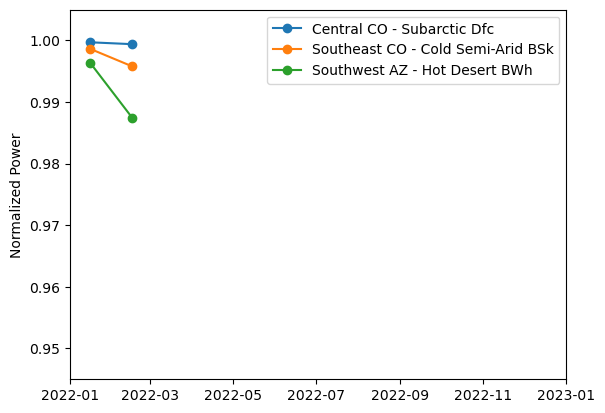

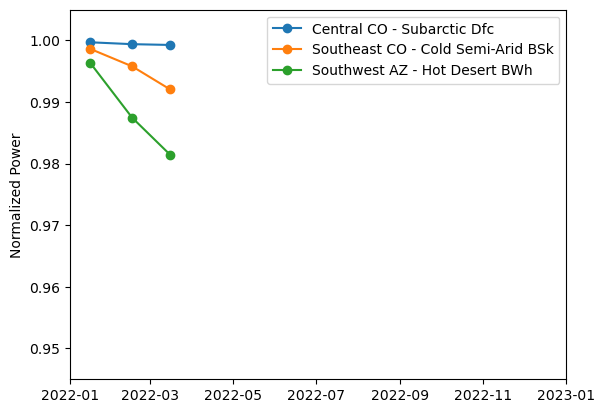

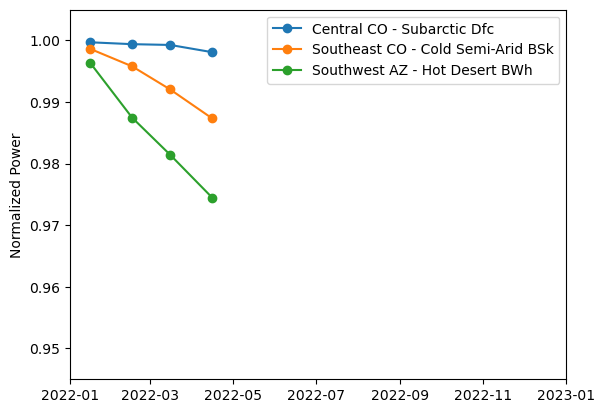

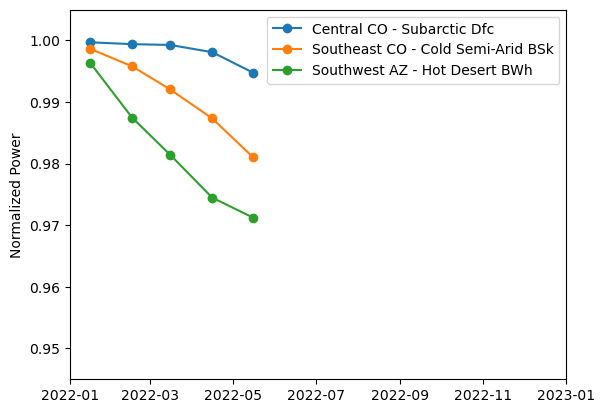

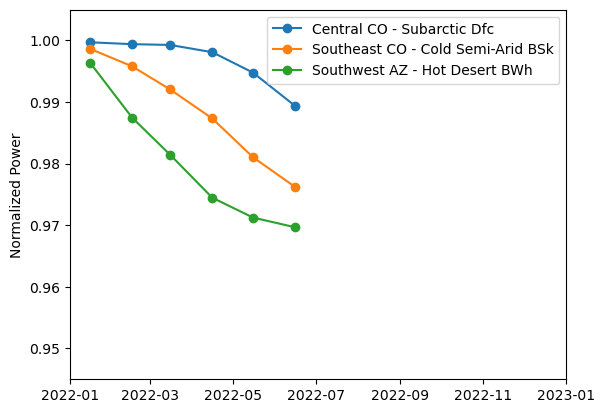

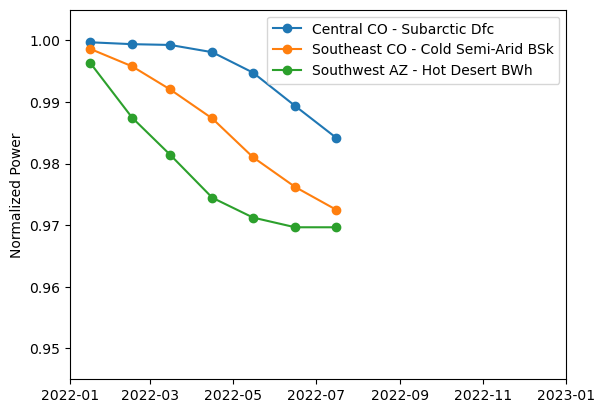

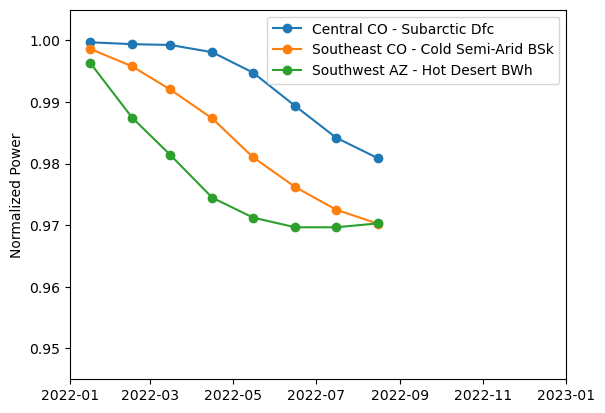

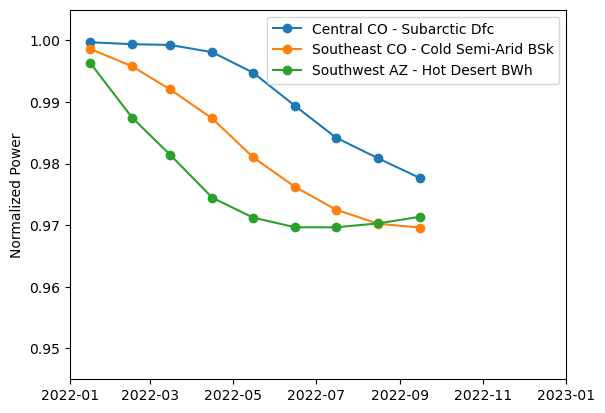

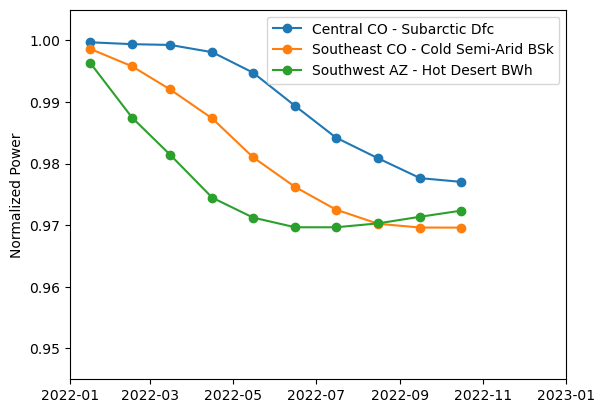

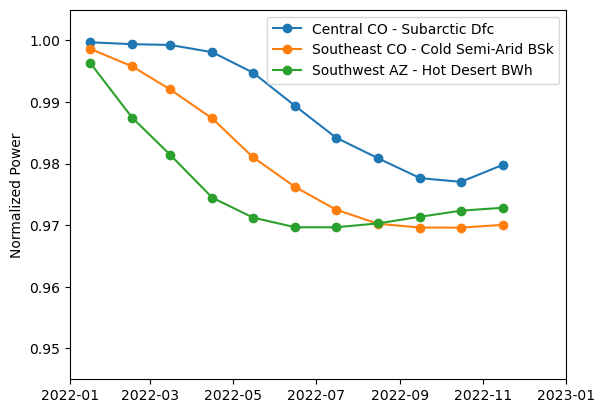

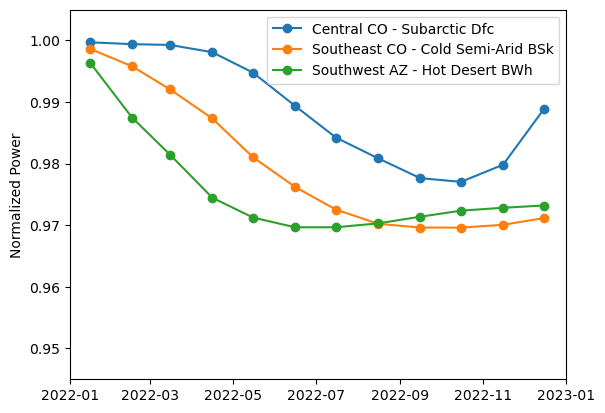

In [34]:
from matplotlib.animation import FuncAnimation
from matplotlib.animation import PillowWriter
import matplotlib.animation as animation
import datetime

ims = []
dates = []
subarctics = []
coldsemiarids = []
hotdeserts = []

for n in range(1, 13):
     for i, np_t in enumerate(letid_res.time):
         t = pd.Timestamp(np_t.values).time()
         d = pd.Timestamp(np_t.values).day
         m = pd.Timestamp(np_t.values).month
         if m == n:
             if d == 15:
                 if t == datetime.time(12)

                     dates.append(np_t.values)

                     #subartic: near Crested Butte CO
                     #cold semi-arid: near Springfield CO
                     #hot desert: near Yuma AZ

                     subarctic = letid_res.sel(time = np_t, latitude= 39.01, longitude = -107.1)
                     subarctics.append(subarctic['Pmp_norm'])

                     coldsemiarid = letid_res.sel(time = np_t, latitude= 37.57, longitude = -102.3)
                     coldsemiarids.append(coldsemiarid['Pmp_norm'])

                     hotdesert = letid_res.sel(time = np_t, latitude= 32.77, longitude = -114.3)
                     hotdeserts.append(hotdesert['Pmp_norm'])

                     fig, ax = plt.subplots()
                     ax.plot(dates, subarctics, marker = 'o', c = 'C0', label = 'Central CO - Subarctic Dfc')
                     ax.plot(dates, coldsemiarids, marker = 'o', c = 'C1', label = 'Southeast CO - Cold Semi-Arid BSk')
                     ax.plot(dates, hotdeserts, marker = 'o', c = 'C2', label = 'Southwest AZ - Hot Desert BWh')

                     ax.legend(loc = 'upper right')

                     ax.set_xlim([datetime.date(2022, 1, 1), datetime.date(2023, 1, 1)])

                     ax.set_ylim([0.945, 1.005])
                     ax.set_ylabel('Normalized Power')

                     plt.savefig(f'./images/LETID_plot_animation_{n}.png', dpi=600)


In [ ]:
import imageio
ims = [imageio.imread(f'./images/LETID_plot_animation_{n}.png') for n in range(1, 13)]
imageio.mimwrite(f'./images/LETID_plot_animation.gif', ims, format='GIF', duration=1000, loop=10)